##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow 2 quickstart for beginners

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/quickstart/beginner"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Load a prebuilt dataset.
1. Build a neural network machine learning model that classifies images.
2. Train this neural network.
3. Evaluate the accuracy of the model.

This tutorial is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. To run all the code in the notebook, select **Runtime** > **Run all**. To run the code cells one at a time, hover over each cell and select the **Run cell** icon.

![Run cell icon](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/images/beginner/run_cell_icon.png?raw=1)

## Set up TensorFlow

Import TensorFlow into your program to get started:

In [6]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.13.0


If you are following along in your own development environment, rather than [Colab](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb), see the [install guide](https://www.tensorflow.org/install) for setting up TensorFlow for development.

Note: Make sure you have upgraded to the latest `pip` to install the TensorFlow 2 package if you are using your own development environment. See the [install guide](https://www.tensorflow.org/install) for details.

## Load a dataset

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). The pixel values of the images range from 0 through 255. Scale these values to a range of 0 to 1 by dividing the values by `255.0`. This also converts the sample data from integers to floating-point numbers:

In [7]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


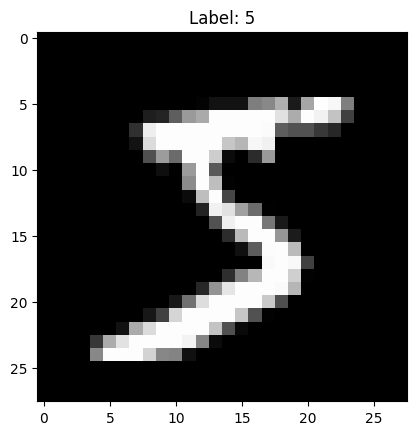

In [8]:
import matplotlib.pyplot as plt
# Display the first image
plt.imshow(x_train[0], cmap='gray')
plt.title(f'Label: {y_train[0]}')
plt.show()

## Build a machine learning model

Build a `tf.keras.Sequential` model:

In [9]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

- ReLU is generally preferred for hidden layers in deep neural networks due to its simplicity and faster training. It’s used in modern architectures like CNNs and RNNs because of its ability to avoid the vanishing gradient problem for positive inputs.
- Sigmoid is typically used in the output layer when the task involves binary classification because its output can be interpreted as a probability. However, for hidden layers, it’s generally avoided in favor of ReLU due to the vanishing gradient problem.

***Understanding the Vanishing Gradient problem***

In [1]:
import numpy as np

# Input and weight
x = 5
w = 0.1

# Linear combination
z = w * x

# Sigmoid activation function
sigmoid = 1 / (1 + np.exp(-z))

# Gradient of the sigmoid function
sigmoid_gradient = sigmoid * (1 - sigmoid)

# Learning rate
eta = 0.01

# Change in weight (gradient * input * learning rate)
delta_w = eta * sigmoid_gradient * x

# Simulate vanishing gradient across 10 layers
layers = 10
gradients = []

# Start with sigmoid gradient from the current layer
current_gradient = sigmoid_gradient

# Multiply by the same small gradient repeatedly for each layer
for layer in range(layers):
    gradients.append(current_gradient)
    current_gradient *= sigmoid_gradient

# Display gradients for each layer
print(gradients)

[0.2350037122015945, 0.05522674474852985, 0.012978490028714429, 0.0030499933355192695, 0.0007167597560371516, 0.00016844120342543985, 3.95843080926823e-05, 9.302459346711958e-06, 2.18611247908173e-06, 5.137445478744372e-07]


Now with ReLU:

In [4]:
# Input and weight
x = 5
w = 0.1

# Linear combination
z = w * x

# ReLU activation function
relu = np.maximum(0, z)

# Gradient of the ReLU function (1 if z > 0, otherwise 0)
relu_gradient = np.where(z > 0, 1, 0)

# Learning rate
eta = 0.01

# Change in weight (gradient * input * learning rate)
delta_w = eta * relu_gradient * x

# Simulate ReLU gradient across 10 layers
layers = 10
gradients = []

# Start with ReLU gradient from the current layer
current_gradient = relu_gradient

# Multiply by the same gradient (always 1 for ReLU with positive inputs) for each layer
for layer in range(layers):
    gradients.append(current_gradient)
    current_gradient *= relu_gradient

# Display gradients for each layer (should be 1 for each layer)
print("Gradients across layers:")
for i, gradient in enumerate(gradients):
    print(f"Layer {i+1}: {gradient}")


Gradients across layers:
Layer 1: 1
Layer 2: 1
Layer 3: 1
Layer 4: 1
Layer 5: 1
Layer 6: 1
Layer 7: 1
Layer 8: 1
Layer 9: 1
Layer 10: 1


Not everything is perfect. For extra credit: The dying ReLU problem occurs when a ReLU activation function outputs zero for all inputs, effectively “dying” and not contributing to learning. 

[`Sequential`](https://www.tensorflow.org/guide/keras/sequential_model) is useful for stacking layers where each layer has one input [tensor](https://www.tensorflow.org/guide/tensor) and one output tensor. Layers are functions with a known mathematical structure that can be reused and have trainable variables. Most TensorFlow models are composed of layers. This model uses the [`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten), [`Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense), and [`Dropout`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) layers.

For each example, the model returns a vector of [logits](https://developers.google.com/machine-learning/glossary#logits) or [log-odds](https://developers.google.com/machine-learning/glossary#log-odds) scores, one for each class.

1. **Definition**: Logits are the raw, unnormalized scores outputted by a neural network before applying any activation function, like softmax or sigmoid.

2. **Purpose**: They serve as the input to these activation functions to produce probabilities. Logits can take any real number, which means they can be positive, negative, or zero.

3. **Usage in Classification**:
   - In **binary classification**, a single logit is used, which is then passed through a sigmoid function to produce a value between 0 and 1 (interpreted as the probability of the positive class).
   - In **multi-class classification**, multiple logits are generated (one for each class). The softmax function is applied to these logits to convert them into probabilities.

### Example

Let’s say we have a simple model that predicts whether an image is of a cat or a dog. 

- The model outputs a logit score of **z = 2.0** for "cat" and **z = -1.0** for "dog".
  
#### Step 1: Converting Logits to Probabilities

For binary classification, we can use the sigmoid function:

P(y=1) = sigmoid(z) = 1 / (1 + e^(-z))

- For "cat":
  P(cat) = 1 / (1 + e^(-2.0)) ≈ 0.88
  
- For "dog":
  P(dog) = 1 - P(cat) ≈ 0.12

This means there's an 88% probability the image is a cat and a 12% probability it is a dog.

#### Step 2: In Multi-Class Classification

If we had three classes (cat, dog, rabbit), the logits might be:
- Cat: z1 = 2.0
- Dog: z2 = 1.0
- Rabbit: z3 = 0.5

We can apply the softmax function to convert these logits into probabilities:

P(i) = e^(zi) / Σ e^(zj)

For example:
- Calculate e^(2.0), e^(1.0), e^(0.5).
- Compute the probabilities for each class.

In [18]:
#This passes the first sample from the x_train dataset 
#to your model to get predictions
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.6471596 ,  0.75369275, -0.41990176, -0.46445358, -0.34835944,
         0.78990304, -0.00809492,  0.72333944,  0.3353809 ,  0.34838843]],
      dtype=float32)

The `tf.nn.softmax` function converts these logits to *probabilities* for each class:

In [19]:
tf.nn.softmax(predictions).numpy()

array([[0.1354873 , 0.15071808, 0.04661007, 0.04457908, 0.05006684,
        0.15627564, 0.07035989, 0.14621203, 0.09919615, 0.10049488]],
      dtype=float32)

For extra credit: It is possible to bake the `tf.nn.softmax` function into the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output.

Define a loss function for training using `losses.SparseCategoricalCrossentropy`:

In [20]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

Before you start training, configure and compile the model using Keras `Model.compile`. Set the [`optimizer`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) class to `adam`, set the `loss` to the `loss_fn` function you defined earlier, and specify a metric to be evaluated for the model by setting the `metrics` parameter to `accuracy`.

In [22]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Train and evaluate your model

Use the `Model.fit` method to adjust your model parameters and minimize the loss:

In [23]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2937 - accuracy: 0.9150
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1412 - accuracy: 0.9575
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1063 - accuracy: 0.9671
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0866 - accuracy: 0.9738
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0768 - accuracy: 0.9756


The `Model.evaluate` method checks the model's performance, usually on a [validation set](https://developers.google.com/machine-learning/glossary#validation-set) or [test set](https://developers.google.com/machine-learning/glossary#test-set).

In [24]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0797 - accuracy: 0.9755 - 588ms/epoch - 2ms/step


[0.07970916479825974, 0.9754999876022339]

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [28]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [30]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[6.5616513e-07, 9.5953867e-09, 3.4238326e-06, 1.2581242e-04,
        5.2398721e-11, 1.2604234e-07, 5.2460244e-14, 9.9983907e-01,
        2.7259505e-06, 2.8178392e-05],
       [1.1719823e-05, 1.0075529e-04, 9.9985898e-01, 2.6978212e-05,
        1.1487647e-15, 1.5029869e-06, 5.5551816e-08, 2.0256446e-13,
        6.3361988e-08, 1.3794648e-11],
       [1.3559151e-07, 9.9966300e-01, 2.2597176e-05, 1.6250016e-05,
        9.6384501e-05, 7.8953053e-06, 2.8986817e-06, 1.2607852e-04,
        6.4214189e-05, 6.6988406e-07],
       [9.9998724e-01, 1.9623949e-09, 7.5009689e-06, 8.0740548e-08,
        7.4433300e-09, 4.3462836e-07, 4.2809970e-06, 2.6923658e-07,
        1.2024519e-08, 1.1003702e-07],
       [5.8949936e-05, 1.6608984e-09, 6.8539721e-06, 2.5846580e-08,
        9.7167373e-01, 1.5663242e-07, 1.1850002e-05, 1.5544279e-04,
        9.3707206e-07, 2.8092014e-02]], dtype=float32)>

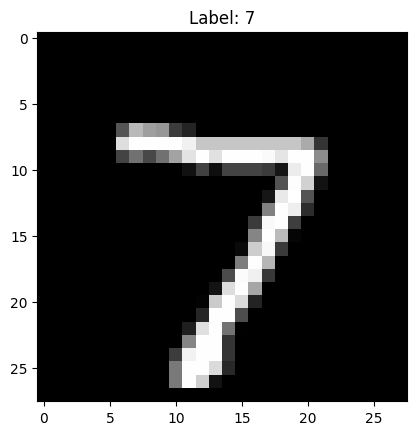

In [31]:
plt.imshow(x_test[0], cmap='gray')
plt.title(f'Label: {y_test[0]}')
plt.show()

## Conclusion

Congratulations! You have trained a machine learning model using a prebuilt dataset using the [Keras](https://www.tensorflow.org/guide/keras/overview) API.

For more examples of using Keras, check out the [tutorials](https://www.tensorflow.org/tutorials/keras/). To learn more about building models with Keras, read the [guides](https://www.tensorflow.org/guide/keras). If you want learn more about loading and preparing data, see the tutorials on [image data loading](https://www.tensorflow.org/tutorials/load_data/images) or [CSV data loading](https://www.tensorflow.org/tutorials/load_data/csv).
